# Klasyfikator SVM

## Zadanie na 3

Implementacja liniowego SVMa

#### Import bibliotek

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC

#### Funkcje do oceny skuteczności 

In [4]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Macierz Pomyłek")
    plt.show()

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy, sensitivity, specificity

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Losowa klasyfikacja')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Krzywa ROC')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_dataset(X, y, title="Dataset"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

#### Wygenerowanie danych 

make_classification

x (2599, 2)
y (2599,)


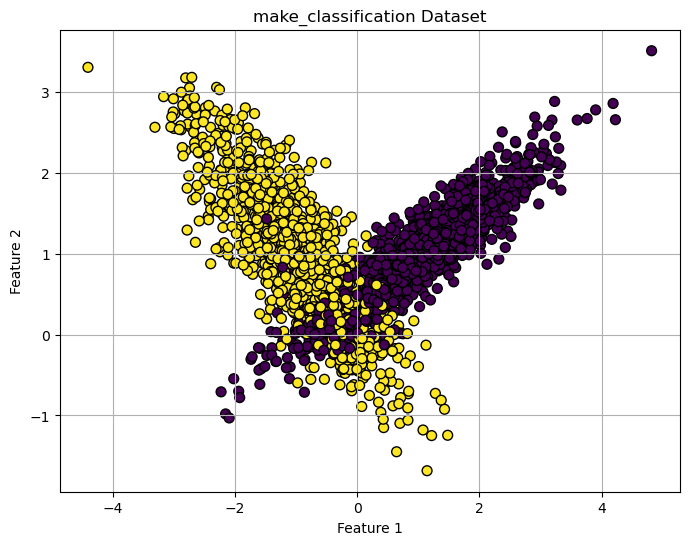

In [5]:
my_index = 259199
my_n_samples = int(str(my_index)[0]+ str(my_index)[1] + str(my_index)[-2] + str(my_index)[-1])
X_classification, y_classification = make_classification(
    n_samples=my_n_samples, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=my_index,
)

print('x', X_classification.shape)
print('y', y_classification.shape)
plot_dataset(X_classification, y_classification, title="make_classification Dataset")

make_moons

X_moons (2599, 2)
y_moons (2599,)


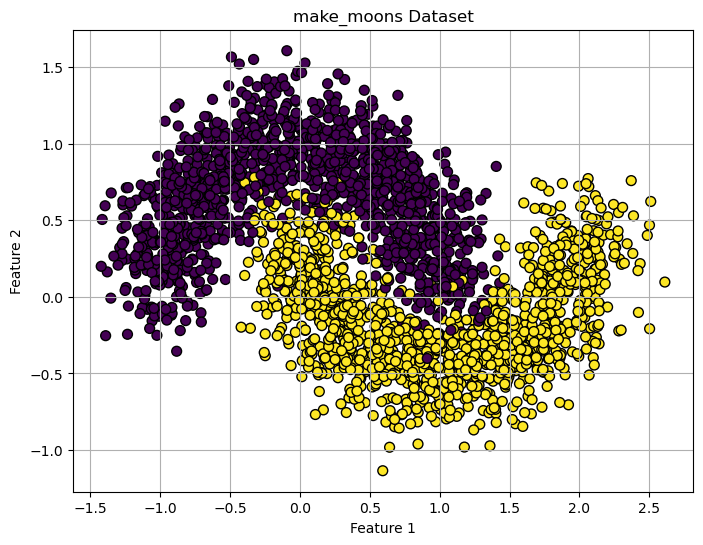

In [6]:
X_moons, y_moons = make_moons(n_samples=my_n_samples, noise=0.2, random_state=my_index)

print('X_moons', X_moons.shape)
print('y_moons', y_moons.shape)
plot_dataset(X_moons, y_moons, title="make_moons Dataset")

#### Podział danych na treningowe i testowe

In [7]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=my_index
)

X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=my_index
)

print('classification', X_train_classification.shape, y_train_classification.shape, X_test_classification.shape, y_test_classification.shape)
print('moons', X_train_moons.shape, y_train_moons.shape, X_test_moons.shape, y_test_moons.shape)

classification (2079, 2) (2079,) (520, 2) (520,)
moons (2079, 2) (2079,) (520, 2) (520,)


### Własna implementacja SVM

Liniowy

In [ ]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.random.rand(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                if y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(approx >= 0, 1, 0)

#### Porównanie wyników

Make Classification
Accuracy: 0.88, Sensitivity: 0.94, Specificity: 0.81


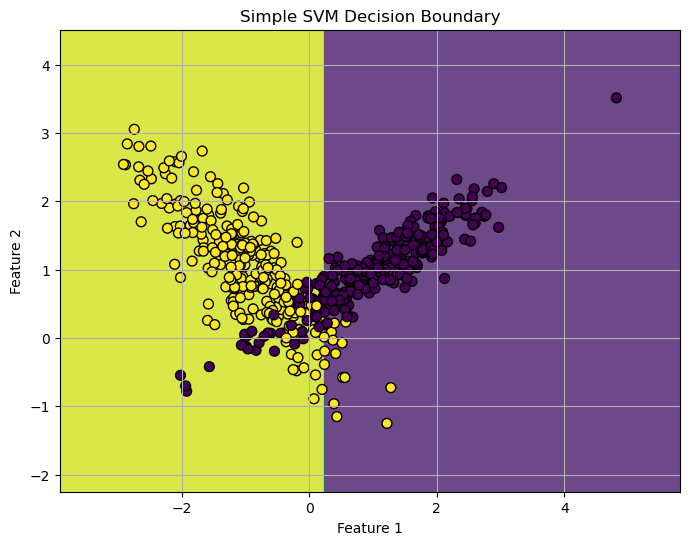

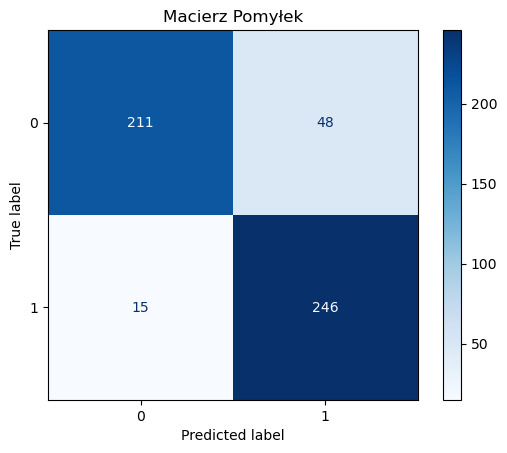

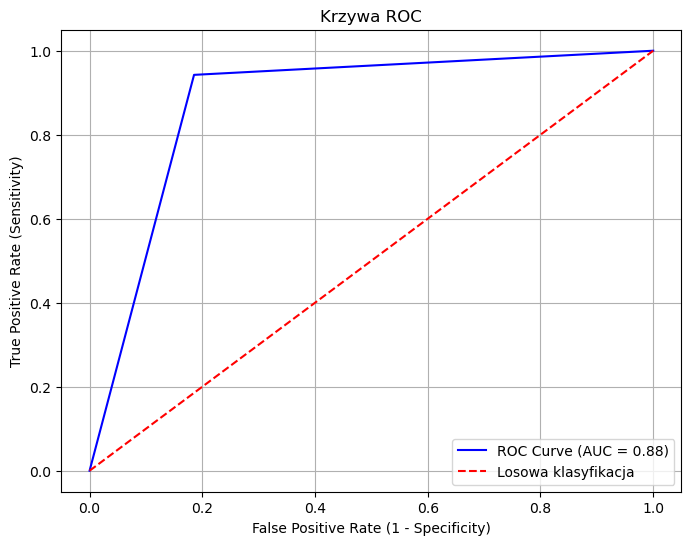

Make Moons
Accuracy: 0.88, Sensitivity: 0.91, Specificity: 0.85


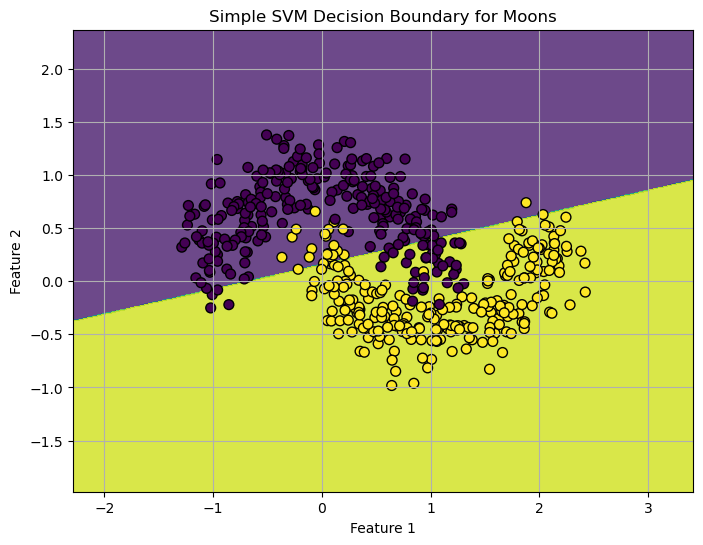

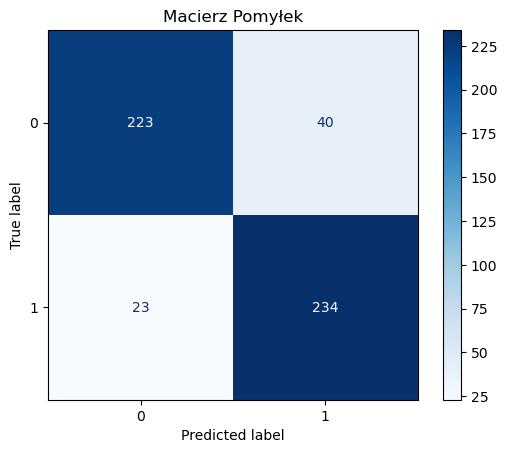

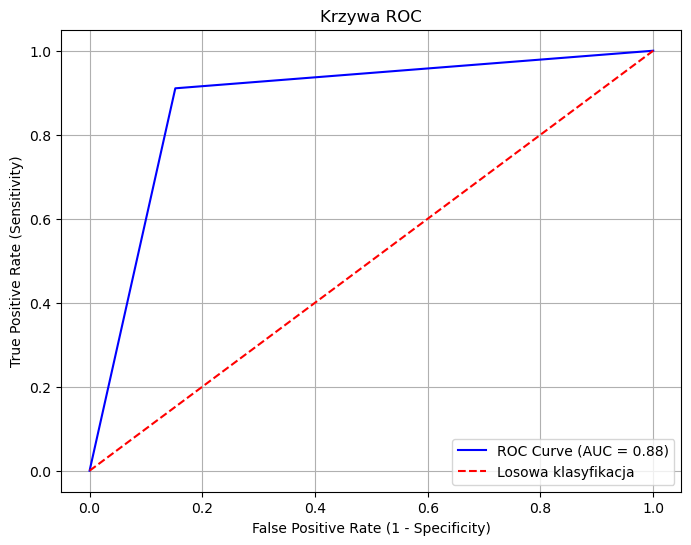

In [9]:
results = pd.DataFrame(columns=["Accuracy", "Sensitivity", "Specificity"])

svm = LinearSVM(learning_rate=0.1, lambda_param=0.01, n_iters=1000)
svm.fit(X_train_classification, y_train_classification)
y_pred = svm.predict(X_test_classification)

print("Make Classification")
accuracy_classification, sensitivity_classification, specificity_classification = calculate_metrics(y_test_classification, y_pred)
print(f"Accuracy: {accuracy_classification:.2f}, Sensitivity: {sensitivity_classification:.2f}, Specificity: {specificity_classification:.2f}")
plot_decision_boundary(svm, X_test_classification, y_test_classification, title="Simple SVM Decision Boundary")
plot_confusion_matrix(y_test_classification, y_pred)
plot_roc_curve(y_test_classification, y_pred)

results.loc["Make Classification (własna implementacja)"] = [accuracy_classification, sensitivity_classification, specificity_classification]

print("Make Moons")
svm_moons = LinearSVM(learning_rate=0.1, lambda_param=0.01, n_iters=1000)
svm_moons.fit(X_train_moons, y_train_moons)
y_pred_moons = svm_moons.predict(X_test_moons)
accuracy_moons, sensitivity_moons, specificity_moons = calculate_metrics(y_test_moons, y_pred_moons)
print(f"Accuracy: {accuracy_moons:.2f}, Sensitivity: {sensitivity_moons:.2f}, Specificity: {specificity_moons:.2f}")
plot_decision_boundary(svm_moons, X_test_moons, y_test_moons, title="Simple SVM Decision Boundary for Moons")
plot_confusion_matrix(y_test_moons, y_pred_moons)
plot_roc_curve(y_test_moons, y_pred_moons)

results.loc["Make Moons (własna implementacja)"] = [accuracy_moons, sensitivity_moons, specificity_moons]

#### sklearn.svm.SVC

z kernel=’linear’

Sklearn SVC classification
Accuracy: 0.90, Sensitivity: 0.95, Specificity: 0.85


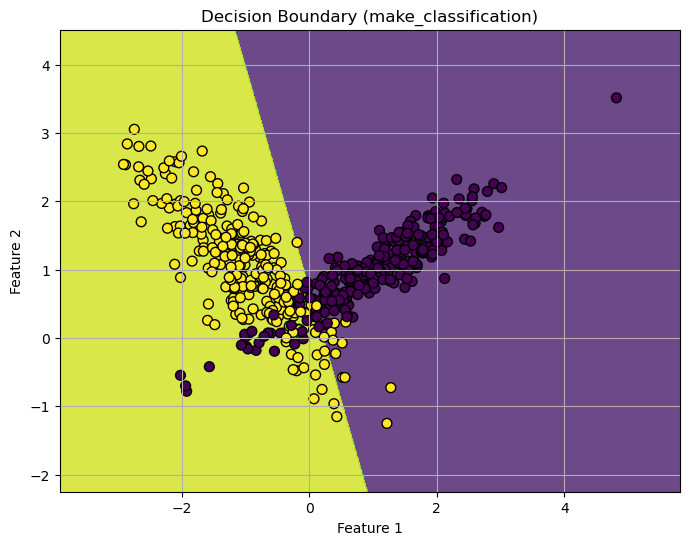

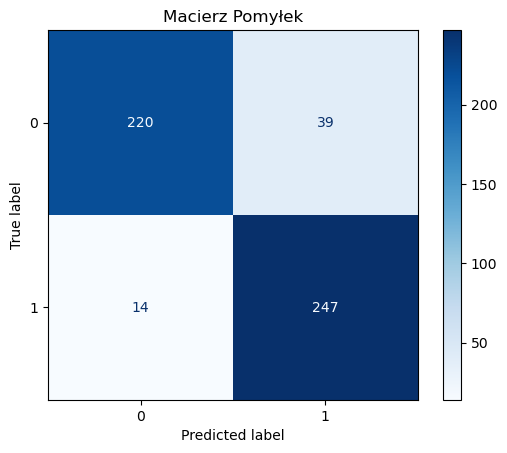

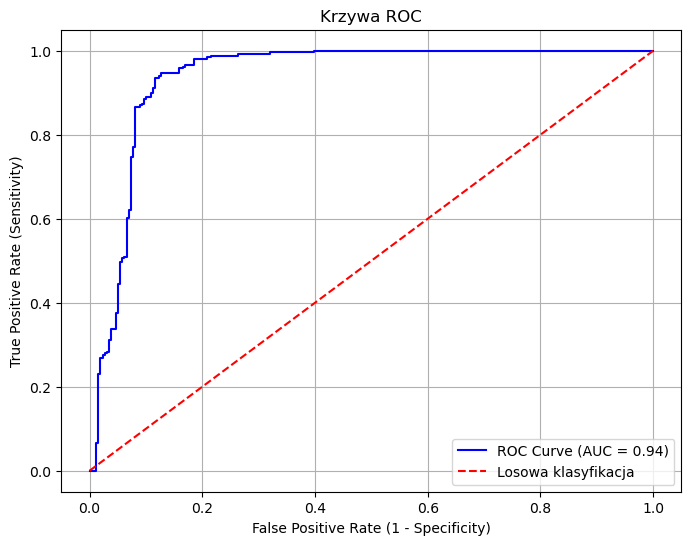

Sklearn SVC moons
Accuracy: 0.88, Sensitivity: 0.91, Specificity: 0.85


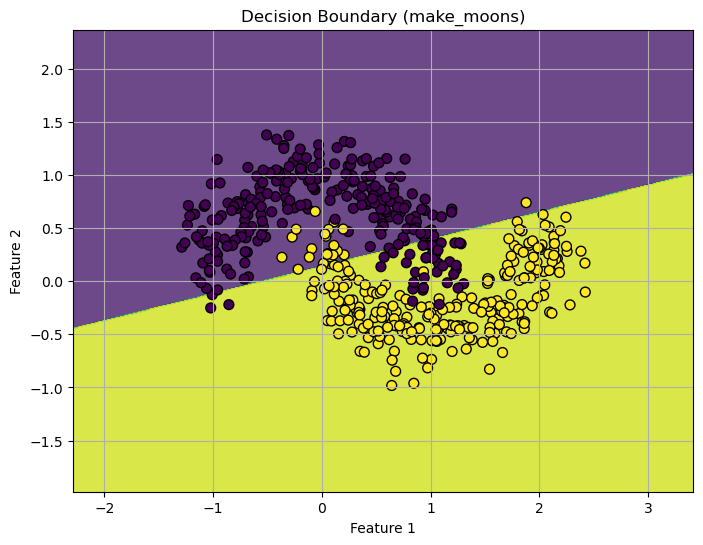

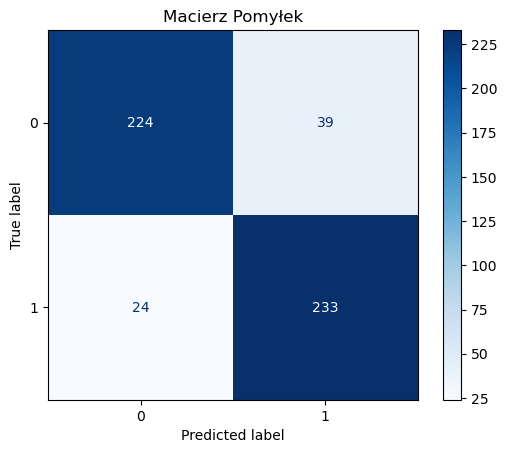

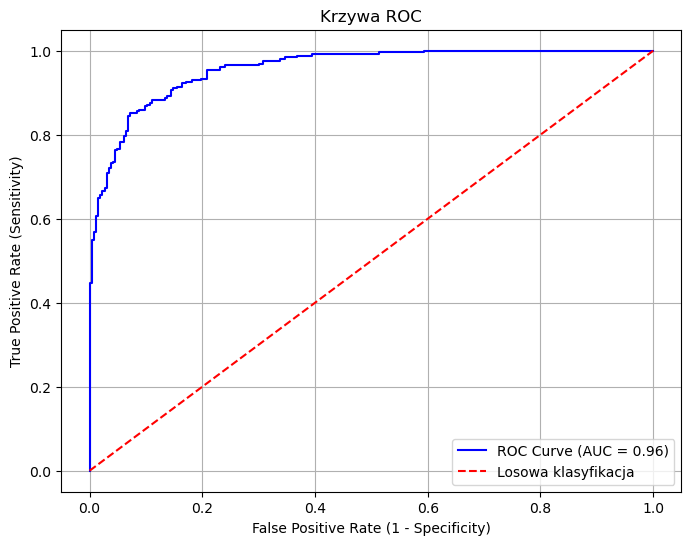

In [10]:
clf_classification = SVC(kernel='linear', random_state=my_index)
clf_classification.fit(X_train_classification, y_train_classification)
y_clf_classification = clf_classification.predict(X_test_classification)

print('Sklearn SVC classification')
accuracy, sensitivity, specificity = calculate_metrics(y_test_classification, y_clf_classification)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_classification, X_test_classification, y_test_classification, title="Decision Boundary (make_classification)")
plot_confusion_matrix(y_test_classification, y_clf_classification, labels=[0, 1])
plot_roc_curve(y_test_classification, clf_classification.decision_function(X_test_classification))

results.loc["Make Classification (sklearn)"] = [accuracy, sensitivity, specificity]

clf_moons = SVC(kernel='linear', random_state=my_index)
clf_moons.fit(X_train_moons, y_train_moons)
y_clf_moons = clf_moons.predict(X_test_moons)

print('Sklearn SVC moons')
accuracy, sensitivity, specificity = calculate_metrics(y_test_moons, y_clf_moons)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_moons, X_test_moons, y_test_moons, title="Decision Boundary (make_moons)")
plot_confusion_matrix(y_test_moons, y_clf_moons, labels=[0, 1])
plot_roc_curve(y_test_moons, clf_moons.decision_function(X_test_moons))

results.loc["Make Moons (sklearn)"] = [accuracy, sensitivity, specificity]

In [ ]:
pd.DataFrame(results)

                                            Accuracy  Sensitivity  Specificity
Make Classification (własna implementacja)  0.878846     0.942529     0.814672
Make Moons (własna implementacja)           0.878846     0.910506     0.847909
Make Classification (sklearn)               0.898077     0.946360     0.849421
Make Moons (sklearn)                        0.878846     0.906615     0.851711


## Zadanie na 4

Implementacja SVMa wykorzystującego funkcję jądra

In [12]:
class mySVM:
    def __init__(self, kernel='linear', C=1.0, gamma='scale'):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.model = None

    def fit(self, X, y):
        self.model = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

### Porównanie wyników 

Własna implementacja 

In [13]:
results = pd.DataFrame(columns=["Accuracy", "Sensitivity", "Specificity"])

sklearn z kernel=’rbf’ na syntetycznych zbiorach dwuwymiarowych danych z jednym klastrem na klasę

Sklearn SVC classification - kernel RBF
Accuracy: 0.94, Sensitivity: 0.98, Specificity: 0.90


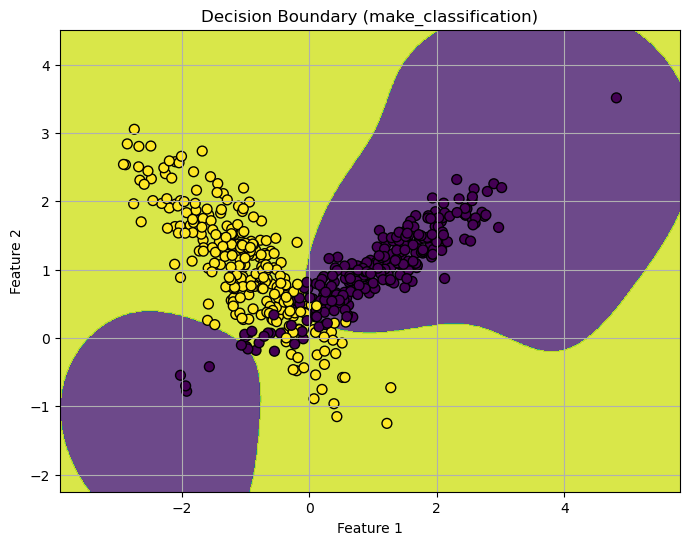

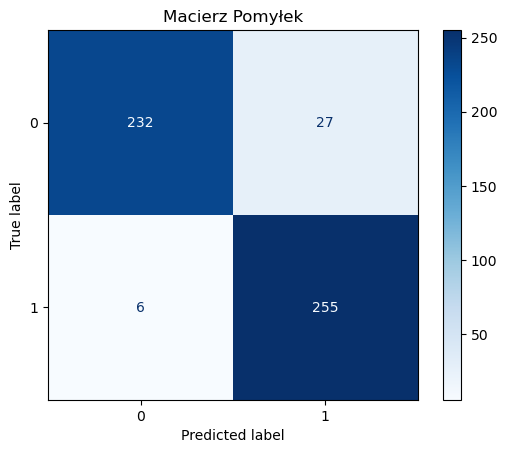

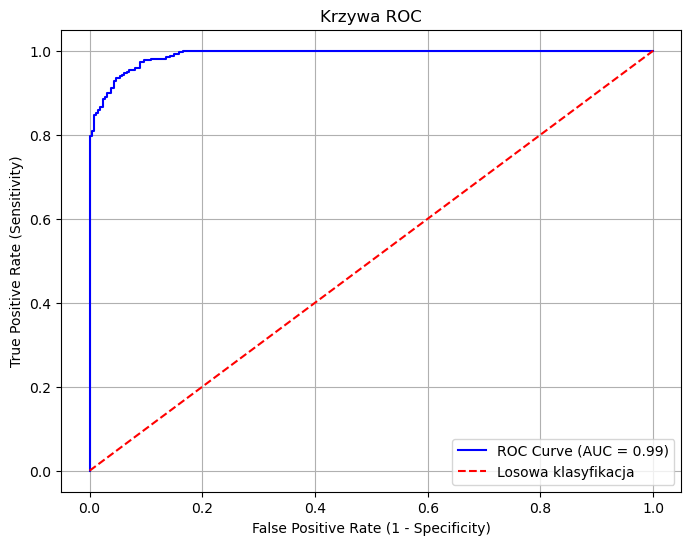

Sklearn SVC moons - kernel RBF
Accuracy: 0.98, Sensitivity: 0.99, Specificity: 0.97


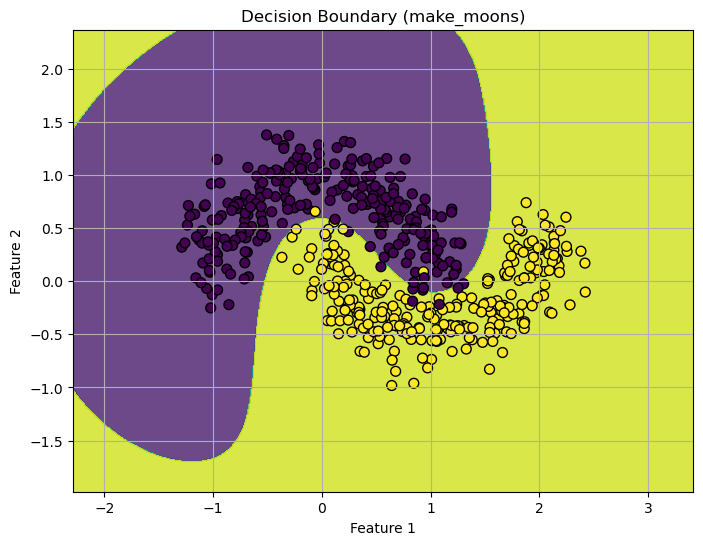

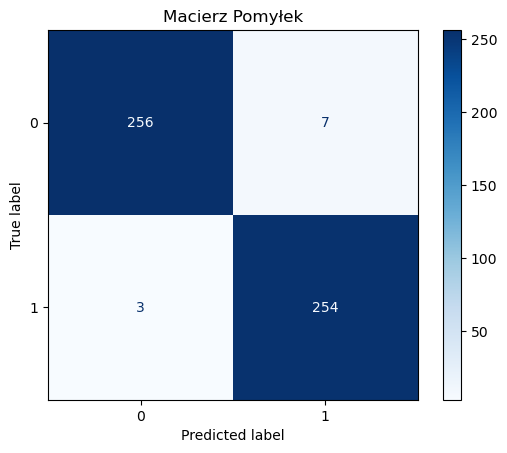

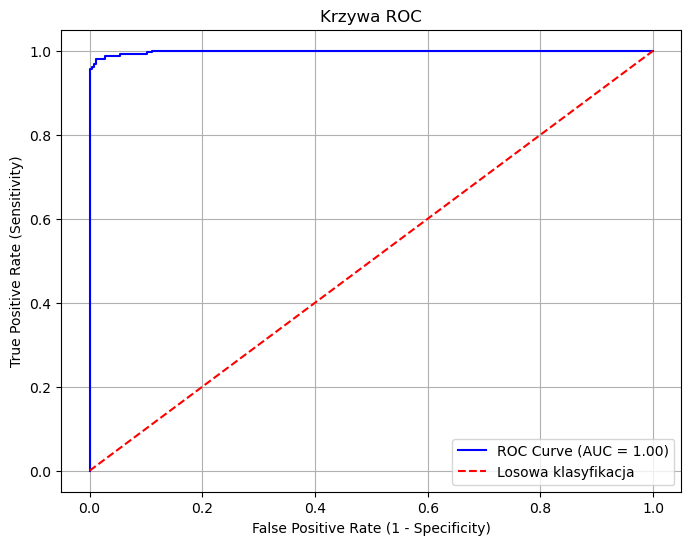

In [14]:
clf_classification = SVC(kernel='rbf', random_state=my_index)
clf_classification.fit(X_train_classification, y_train_classification)
y_clf_classification = clf_classification.predict(X_test_classification)

print('Sklearn SVC classification - kernel RBF')
accuracy, sensitivity, specificity = calculate_metrics(y_test_classification, y_clf_classification)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_classification, X_test_classification, y_test_classification, title="Decision Boundary (make_classification)")
plot_confusion_matrix(y_test_classification, y_clf_classification, labels=[0, 1])
plot_roc_curve(y_test_classification, clf_classification.decision_function(X_test_classification))

results.loc["Make Classification (sklearn - kernel RBF)"] = [accuracy, sensitivity, specificity]

clf_moons = SVC(kernel='rbf', random_state=my_index)
clf_moons.fit(X_train_moons, y_train_moons)
y_clf_moons = clf_moons.predict(X_test_moons)

print('Sklearn SVC moons - kernel RBF')
accuracy, sensitivity, specificity = calculate_metrics(y_test_moons, y_clf_moons)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_moons, X_test_moons, y_test_moons, title="Decision Boundary (make_moons)")
plot_confusion_matrix(y_test_moons, y_clf_moons, labels=[0, 1])
plot_roc_curve(y_test_moons, clf_moons.decision_function(X_test_moons))

results.loc["Make Moons (sklearn - kernel RBF)"] = [accuracy, sensitivity, specificity]

sklearn z kernel='poly' na syntetycznych zbiorach dwuwymiarowych danych z jednym klastrem na klasę

Sklearn SVC classification - kernel Poly
Accuracy: 0.87, Sensitivity: 0.98, Specificity: 0.76


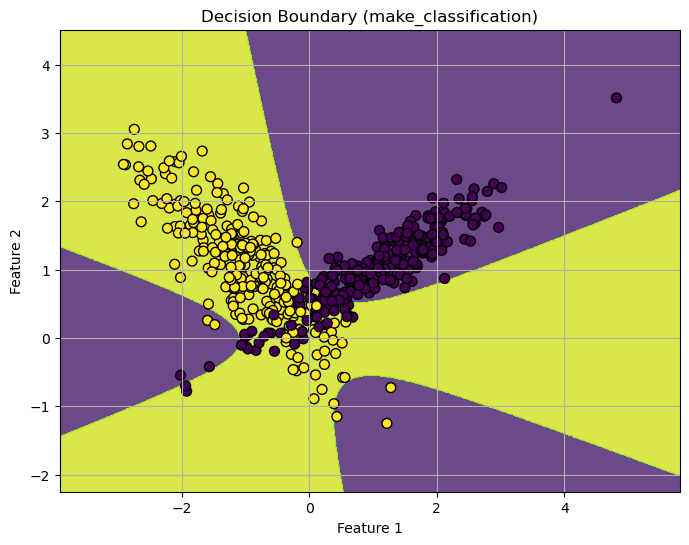

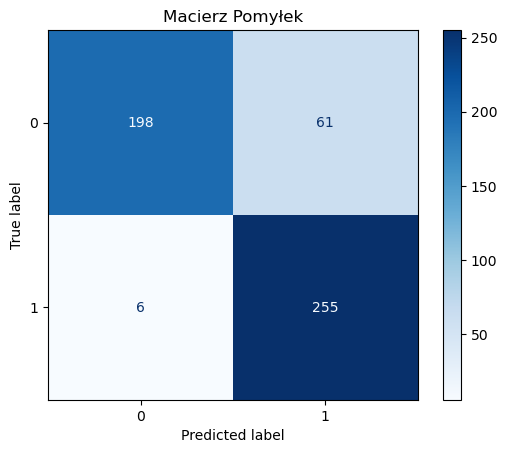

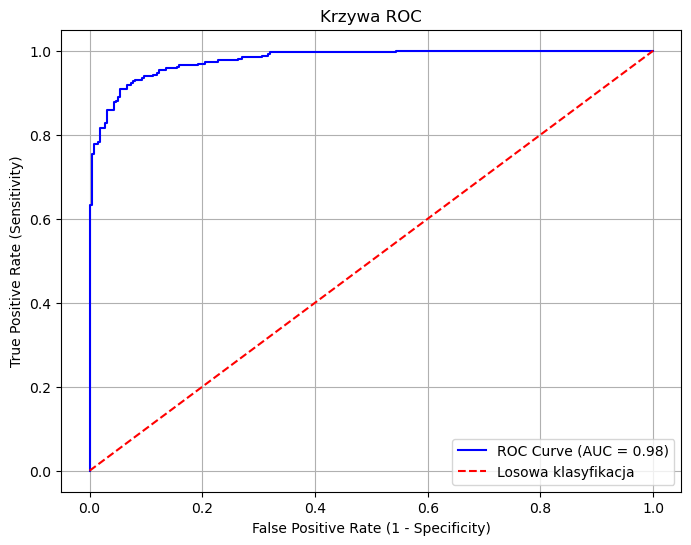

Sklearn SVC moons - kernel Poly
Accuracy: 0.90, Sensitivity: 0.98, Specificity: 0.83


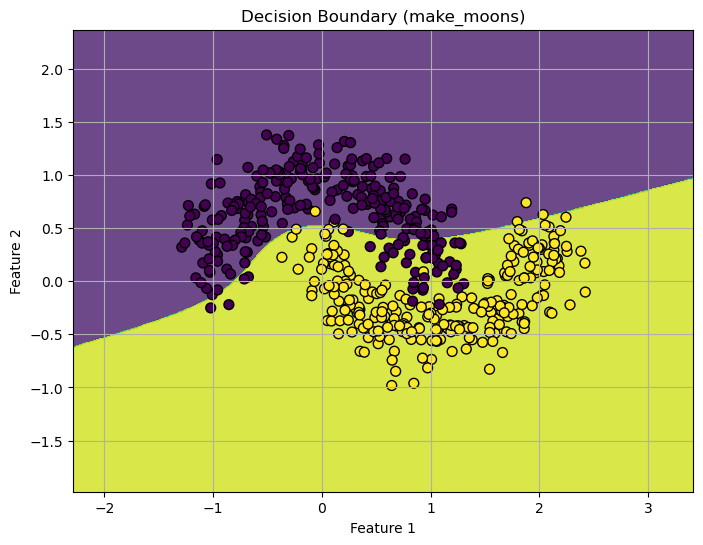

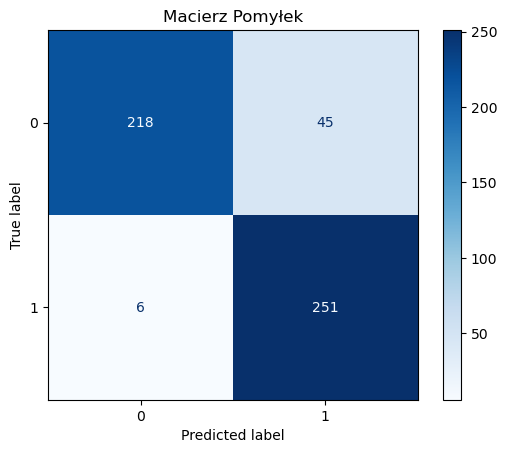

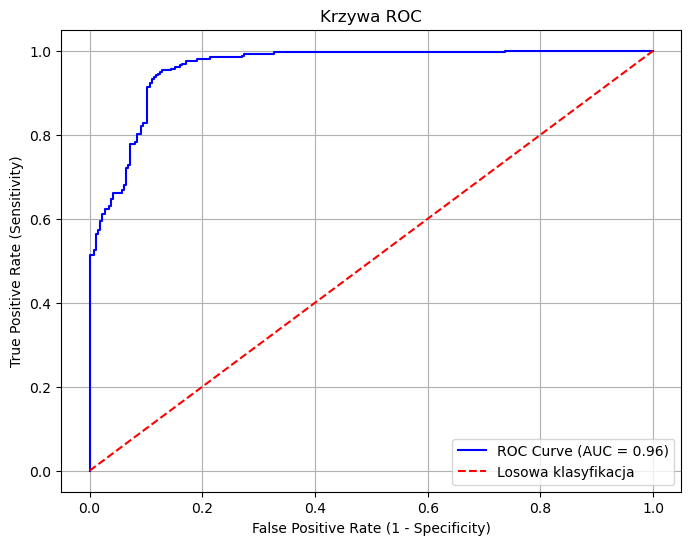

In [15]:
clf_classification = SVC(kernel='poly', random_state=my_index)
clf_classification.fit(X_train_classification, y_train_classification)
y_clf_classification = clf_classification.predict(X_test_classification)

print('Sklearn SVC classification - kernel Poly')
accuracy, sensitivity, specificity = calculate_metrics(y_test_classification, y_clf_classification)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_classification, X_test_classification, y_test_classification, title="Decision Boundary (make_classification)")
plot_confusion_matrix(y_test_classification, y_clf_classification, labels=[0, 1])
plot_roc_curve(y_test_classification, clf_classification.decision_function(X_test_classification))

results.loc["Make Classification (sklearn - kernel Poly)"] = [accuracy, sensitivity, specificity]

clf_moons = SVC(kernel='poly', random_state=my_index)
clf_moons.fit(X_train_moons, y_train_moons)
y_clf_moons = clf_moons.predict(X_test_moons)

print('Sklearn SVC moons - kernel Poly')
accuracy, sensitivity, specificity = calculate_metrics(y_test_moons, y_clf_moons)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_decision_boundary(clf_moons, X_test_moons, y_test_moons, title="Decision Boundary (make_moons)")
plot_confusion_matrix(y_test_moons, y_clf_moons, labels=[0, 1])
plot_roc_curve(y_test_moons, clf_moons.decision_function(X_test_moons))

results.loc["Make Moons (sklearn - kernel Poly)"] = [accuracy, sensitivity, specificity]

In [16]:
pd.DataFrame(results)

,Accuracy,Sensitivity,Specificity
Make Classification (sklearn - kernel RBF),0.936538,0.977011,0.895753
Make Moons (sklearn - kernel RBF),0.980769,0.988327,0.973384
Make Classification (sklearn - kernel Poly),0.871154,0.977011,0.764479
Make Moons (sklearn - kernel Poly),0.901923,0.976654,0.828897


## Zadanie na 5

Analiza zbioru SDSS17 w oparciu o SVM

#### Pobranie danych 

Zbiór Stellar Classification Dataset - SDSS17

In [21]:
file_path = f'./datasets/star_classification_SDSS17.csv'
data = pd.read_csv(file_path)

data.head()
print(data.shape)

(100000, 18)


#### Usunięcie kolumn 

’cam_col’, ’MJD’ oraz te kończące się na ’_ID’

In [22]:
columns_to_drop = ['cam_col', 'MJD'] + [col for col in data.columns if col.endswith('_ID')]
data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121


#### Odseparowanie kolumny z wartością przewidywaną

Podział na x i y

In [23]:
X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique classes in y:", np.unique(y))

X shape: (100000, 9)
y shape: (100000,)
Unique classes in y: ['GALAXY' 'QSO' 'STAR']


#### Imputacja brakujących wartości

- zmienne kategoryczne należy zastąpić dominantą 
- dane numeryczne należy zastąpić medianą

In [24]:
missing_values_before = X.isnull().sum()


if missing_values_before.sum() > 0:
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = X[col].mode()[0]
        X[col].fillna(mode_value, inplace=True)

    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)

missing_values_after = X.isnull().sum()
comparison_table = pd.DataFrame({
    'Column': X.columns,
    'Missing Before': missing_values_before.values,
    'Missing After': missing_values_after.values
})

print(comparison_table)
print('y missing: ', y.isnull().sum())

     Column  Missing Before  Missing After
0     alpha               0              0
1     delta               0              0
2         u               0              0
3         g               0              0
4         r               0              0
5         i               0              0
6         z               0              0
7  redshift               0              0
8     plate               0              0
y missing:  0


#### Macierz korelacji cech

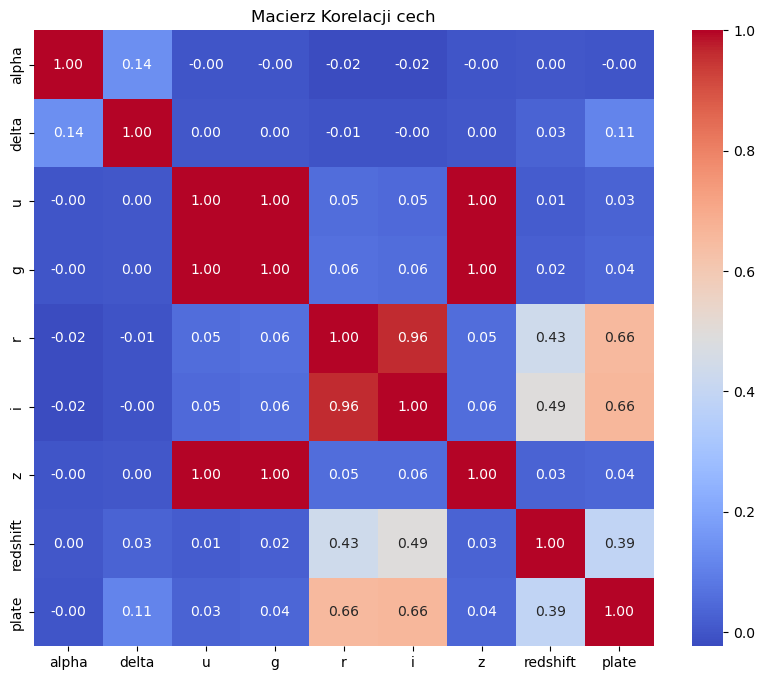

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macierz Korelacji cech")
plt.show()

#### Normalizacja wartości

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_X = scaler.fit_transform(X)

X = pd.DataFrame(new_X, columns=X.columns)

X.head()

,alpha,delta,u,g,r,i,z,redshift,plate
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.091831,0.451592
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.112389,0.828841
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.093170,0.350949
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.134210,0.723312
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.017959,0.476753


#### Wybór danych gwiazd i galaktyk 

In [27]:
X['class'] = y

X = X[X['class'] != 'QSO']

y = X['class']
X = X.drop(columns=['class'])

print(y.shape, y.unique())
X.head()

(81039,) ['GALAXY' 'STAR']


,alpha,delta,u,g,r,i,z,redshift,plate
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.091831,0.451592
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.112389,0.828841
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.093170,0.350949
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.134210,0.723312
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.017959,0.476753


#### Podział danych na treningowe i testowe

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_index)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(64831, 9) (64831,) (16208, 9) (16208,)


### GridSearch

Szukanie najlepszych parametrów do SVM

In [ ]:
svm = SVC(random_state=my_index)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Najlepsze znalezione hiperparametry:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Wyniki dla najlepszego modelu

Accuracy: 0.99, Sensitivity: 1.00, Specificity: 0.99


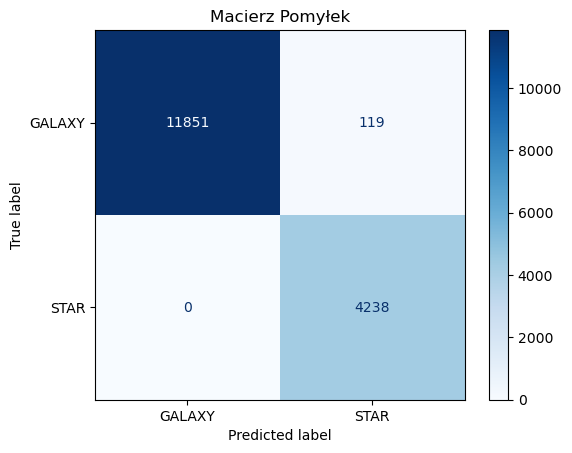

In [ ]:
y_pred = best_svm.predict(X_test)

accuracy, sensitivity, specificity = calculate_metrics(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")
plot_confusion_matrix(y_test, y_pred, labels=np.unique(y))